In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime

In [2]:
# Create empty city_data 
city_data = []
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

In [7]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02d"}],"base":"stations","main":{"temp":77.95,"feels_like":78.75,"temp_min":71.55,"temp_max":87.62,"pressure":1015,"humidity":70},"visibility":10000,"wind":{"speed":17.27,"deg":100},"clouds":{"all":20},"dt":1659568209,"sys":{"type":2,"id":2009921,"country":"US","sunrise":1659519526,"sunset":1659571320},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [11]:
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 77.95,
  'feels_like': 78.75,
  'temp_min': 71.55,
  'temp_max': 87.62,
  'pressure': 1015,
  'humidity': 70},
 'visibility': 10000,
 'wind': {'speed': 17.27, 'deg': 100},
 'clouds': {'all': 20},
 'dt': 1659568209,
 'sys': {'type': 2,
  'id': 2009921,
  'country': 'US',
  'sunrise': 1659519526,
  'sunset': 1659571320},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 77.95,
  'feels_like': 78.75,
  'temp_min': 71.55,
  'temp_max': 87.62,
  'pressure': 1015,
  'humidity': 70},
 'visibility': 10000,
 'wind': {'speed': 17.27, 'deg': 100},
 'clouds': {'all': 20},
 'dt': 1659568209,
 'sys': {'type': 2,
  'id': 2009921,
  'country': 'US',
  'sunrise': 1659519526,
  'sunset': 1659571320},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [15]:
# Get the JSON data.
boston_data = city_weather.json()

In [16]:
boston_data['sys']

{'type': 2,
 'id': 2009921,
 'country': 'US',
 'sunrise': 1659519526,
 'sunset': 1659571320}

In [17]:
boston_data['sys']['country']

'US'

In [18]:
boston_data['dt']

1659568209

In [19]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 87.62 70 20 17.27


In [20]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-08-03 23:10:09'

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dingle
Processing Record 2 of Set 1 | cherskiy
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | sabang
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | ninotsminda
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | bonthe
Processing Record 19 of Set 1 | amderma
City not found. Skipping...
Processing Record 20 of Set 1 | derzhavinsk
Processing Record 21 of Set 1 | east london
Processing Record 22 of Set 1 | phan 

Processing Record 34 of Set 4 | touros
Processing Record 35 of Set 4 | talcahuano
Processing Record 36 of Set 4 | guerrero negro
Processing Record 37 of Set 4 | drochtersen
Processing Record 38 of Set 4 | torbay
Processing Record 39 of Set 4 | lewistown
Processing Record 40 of Set 4 | namatanai
Processing Record 41 of Set 4 | gat
Processing Record 42 of Set 4 | namibe
Processing Record 43 of Set 4 | haines junction
Processing Record 44 of Set 4 | prabumulih
Processing Record 45 of Set 4 | saint george
Processing Record 46 of Set 4 | paradwip
City not found. Skipping...
Processing Record 47 of Set 4 | kashi
Processing Record 48 of Set 4 | norman wells
Processing Record 49 of Set 4 | vila franca do campo
Processing Record 50 of Set 4 | ouro preto do oeste
Processing Record 1 of Set 5 | beruwala
Processing Record 2 of Set 5 | hof
Processing Record 3 of Set 5 | qaqortoq
Processing Record 4 of Set 5 | tateyama
Processing Record 5 of Set 5 | chenghai
Processing Record 6 of Set 5 | port blair

Processing Record 23 of Set 8 | maxixe
Processing Record 24 of Set 8 | kawalu
Processing Record 25 of Set 8 | sassandra
Processing Record 26 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 27 of Set 8 | jiayuguan
Processing Record 28 of Set 8 | coari
Processing Record 29 of Set 8 | sampit
Processing Record 30 of Set 8 | gotsu
Processing Record 31 of Set 8 | butte
Processing Record 32 of Set 8 | codrington
Processing Record 33 of Set 8 | matara
Processing Record 34 of Set 8 | saleaula
City not found. Skipping...
Processing Record 35 of Set 8 | mayumba
Processing Record 36 of Set 8 | bima
Processing Record 37 of Set 8 | rolim de moura
City not found. Skipping...
Processing Record 38 of Set 8 | bosaso
Processing Record 39 of Set 8 | salalah
Processing Record 40 of Set 8 | hobyo
Processing Record 41 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 42 of Set 8 | port hedland
Processing Record 43 of Set 8 | san vicente
Processing Record 44 of Set 8 | menon

Processing Record 13 of Set 12 | jinka
Processing Record 14 of Set 12 | ondorhaan
City not found. Skipping...
Processing Record 15 of Set 12 | alta floresta
Processing Record 16 of Set 12 | faya
Processing Record 17 of Set 12 | russell
Processing Record 18 of Set 12 | eydhafushi
Processing Record 19 of Set 12 | bilma
Processing Record 20 of Set 12 | aksaray
Processing Record 21 of Set 12 | longkou
Processing Record 22 of Set 12 | pauini
Processing Record 23 of Set 12 | capreol
Processing Record 24 of Set 12 | saint pete beach
Processing Record 25 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 26 of Set 12 | salym
Processing Record 27 of Set 12 | mafinga
Processing Record 28 of Set 12 | rivne
Processing Record 29 of Set 12 | galeana
Processing Record 30 of Set 12 | kupang
Processing Record 31 of Set 12 | pangnirtung
Processing Record 32 of Set 12 | atar
Processing Record 33 of Set 12 | ghorawal
Processing Record 34 of Set 12 | labytnangi
Processing Record 35 of Set 1

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dingle,10.9995,122.6711,78.08,90,100,1.99,PH,2022-08-03 23:11:17
1,Cherskiy,68.7500,161.3000,50.45,71,100,8.52,RU,2022-08-03 23:11:17
2,Arraial Do Cabo,-22.9661,-42.0278,69.80,73,0,7.25,BR,2022-08-03 23:00:53
3,Ushuaia,-54.8000,-68.3000,37.18,97,100,5.01,AR,2022-08-03 23:00:29
4,Mar Del Plata,-38.0023,-57.5575,50.88,86,39,4.00,AR,2022-08-03 23:01:51
5,Mataura,-46.1927,168.8643,46.65,72,100,5.14,NZ,2022-08-03 23:01:34
6,Thompson,55.7435,-97.8558,60.96,51,75,10.36,CA,2022-08-03 23:00:21
7,Rikitea,-23.1203,-134.9692,71.64,69,36,15.50,PF,2022-08-03 23:01:24
8,Albany,42.6001,-73.9662,87.64,48,4,3.18,US,2022-08-03 22:56:56
9,Bredasdorp,-34.5322,20.0403,47.59,93,5,6.06,ZA,2022-08-03 23:11:19


In [23]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dingle,PH,2022-08-03 23:11:17,10.9995,122.6711,78.08,90,100,1.99
1,Cherskiy,RU,2022-08-03 23:11:17,68.7500,161.3000,50.45,71,100,8.52
2,Arraial Do Cabo,BR,2022-08-03 23:00:53,-22.9661,-42.0278,69.80,73,0,7.25
3,Ushuaia,AR,2022-08-03 23:00:29,-54.8000,-68.3000,37.18,97,100,5.01
4,Mar Del Plata,AR,2022-08-03 23:01:51,-38.0023,-57.5575,50.88,86,39,4.00
...,...,...,...,...,...,...,...,...,...
566,Veraval,IN,2022-08-03 23:27:03,20.9000,70.3667,81.39,82,79,5.41
567,Coihaique,CL,2022-08-03 23:23:58,-45.5752,-72.0662,39.15,81,75,6.91
568,Turukhansk,RU,2022-08-03 23:27:04,65.8167,87.9833,49.86,66,24,6.80
569,Carauari,BR,2022-08-03 23:27:05,-4.8828,-66.8958,79.65,78,92,1.41


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

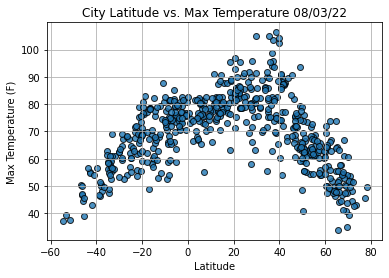

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

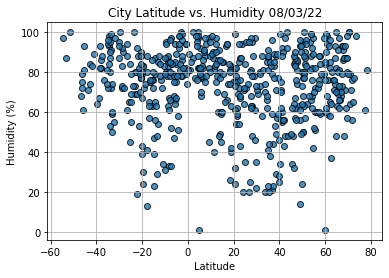

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

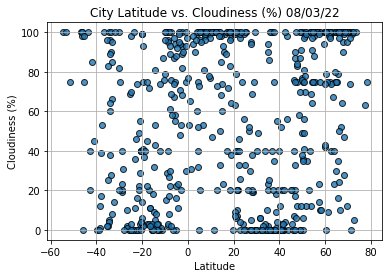

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

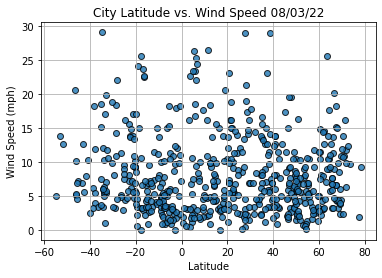

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [33]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [34]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

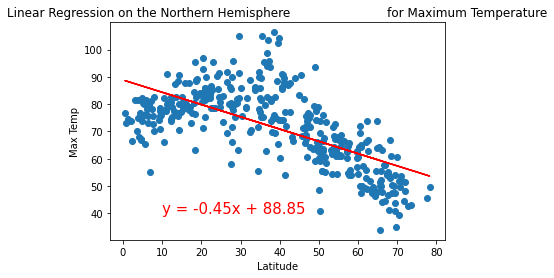

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

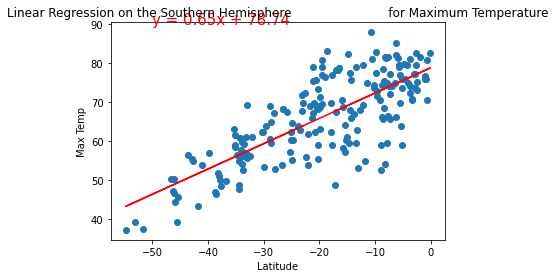

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

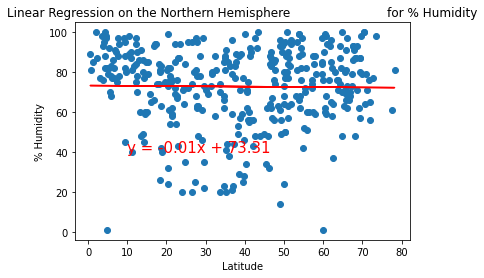

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(10,40))

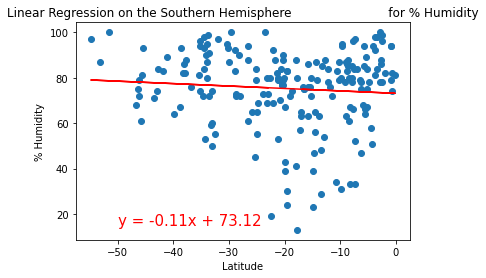

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

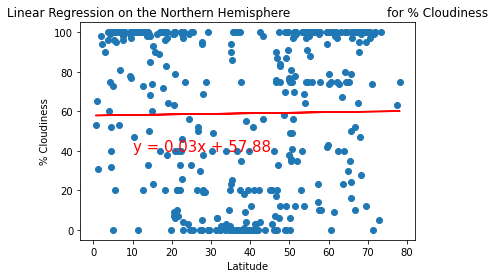

In [39]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness', (10,40))

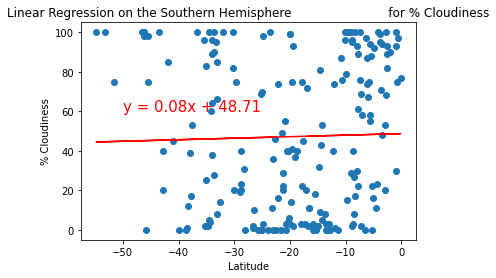

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

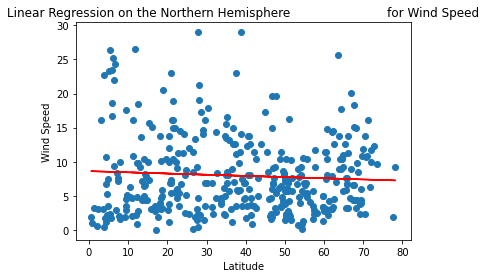

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

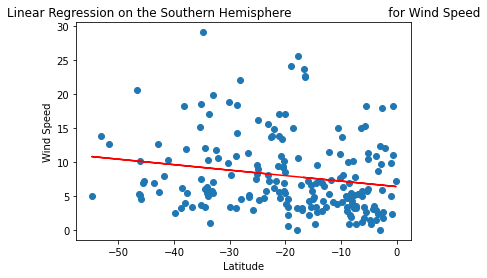

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))